In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
train_df=pd.read_csv("C:/Users/dell/OneDrive/Desktop/train.csv")
test_df=pd.read_csv("C:/Users/dell/Downloads/test (1).csv")
submissions=pd.DataFrame()

In [70]:
pd.set_option('display.max_columns',None)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
train_df.shape

(1460, 81)

change all columns_name into lowercase

In [72]:
train_df.columns=train_df.columns.str.lower()
test_df.columns=test_df.columns.str.lower()

drop unnecessary columns

In [73]:
train_df.drop(['id'],axis=1,inplace=True)
submissions['id']=test_df['id'] #save the id column bec we will need it in submission
test_df.drop(['id'],axis=1,inplace=True)

split columns into categories_columns and numerical_columns

In [74]:
num_cols=list(set(train_df.describe().columns))
obj_cols=list(set(train_df.columns)-set(num_cols))

check Null values in num_cols

In [75]:
nulls=train_df[num_cols].isnull().sum().reset_index().rename(columns={0:"Freq_null"}).sort_values(by="Freq_null",ascending=False)
nulls['Percentage']=nulls['Freq_null']/1460*100
nulls[nulls['Freq_null']>0]

,index,Freq_null,Percentage
31,lotfrontage,259,17.739726
27,garageyrblt,81,5.547945
17,masvnrarea,8,0.547945


Handle nulls

In [76]:
# Divide columns based on the level of nulls to determine the appropriate action for each.
drop_rows=["masvnrarea"]
fill_columns=["lotfrontage","garageyrblt"]

In [77]:
train_df.dropna(subset=drop_rows,axis=0,inplace=True)

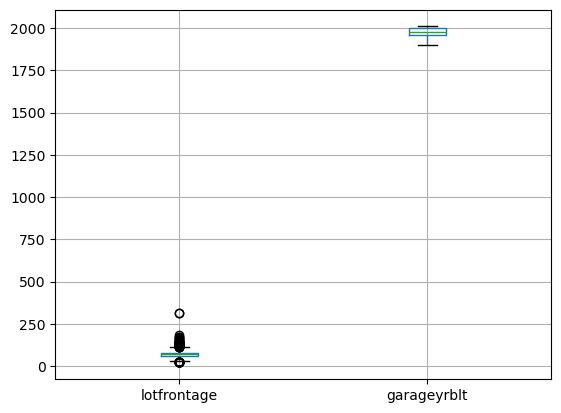

In [78]:
train_df[fill_columns].boxplot()
plt.show()

In [79]:
train_df['lotfrontage'].fillna(train_df['lotfrontage'].median(),inplace=True) # bec. there are outliers
train_df['garageyrblt'].fillna(train_df['garageyrblt'].mean(),inplace=True)

Fill nulls in test_df

In [80]:
test_df['lotfrontage'].fillna(train_df['lotfrontage'].median(),inplace=True) 
test_df['garageyrblt'].fillna(train_df['garageyrblt'].mean(),inplace=True)

In [81]:
num_test_cols=list(set(test_df.describe().columns))

In [82]:
N=test_df[num_test_cols].isnull().sum().reset_index().rename(columns={0:'freq',"index":"column_name"})
for row_idx,row in N.iterrows():
    if row['freq']>0:
        test_df[row['column_name']].fillna(train_df[row['column_name']].mean(),inplace=True)


Check null values in obj_cols

In [83]:
threshold=0.8
var=train_df[obj_cols].isnull().sum().reset_index().rename(columns={0:"frequency","index":"columns"})
var["percentage"]=var["frequency"]/train_df.shape[0]
var[var['frequency']>0]


,columns,frequency,percentage
0,miscfeature,1398,0.962810
3,bsmtfintype1,37,0.025482
5,garagequal,81,0.055785
9,bsmtexposure,38,0.026171
11,bsmtqual,37,0.025482
12,garagefinish,81,0.055785
18,fence,1171,0.806474
19,bsmtcond,37,0.025482
22,masvnrtype,864,0.595041
23,bsmtfintype2,38,0.026171


In [84]:
# drop all columns have null_values >= 80%
drops=var["columns"][var["percentage"]>=threshold]
train_df.drop(columns=drops,inplace=True)
test_df.drop(columns=drops,inplace=True)

In [85]:
num_cols=list(set(train_df.describe().columns))
obj_cols=list(set(train_df.columns)-set(num_cols))

Fill nulls

In [86]:
# function to fill all categorical columns with mode
def fill_null(obj_columns):

   x=train_df[obj_columns].isnull().sum().reset_index().rename(columns={0:"frequency","index":"columns"})
   fills=x["columns"][x["frequency"]>0]
   for col in fills:
        
        mode_value = train_df[col].mode()[0]  # Get the mode of the column
        train_df[col].fillna(mode_value, inplace=True) 


In [87]:
fill_null(obj_cols)

Check if all nulls are handled 

In [88]:
nulls=train_df.isnull().sum().reset_index().rename(columns={0:"Freq_null"}).sort_values(by="Freq_null",ascending=False)
nulls[nulls['Freq_null']>0]

,index,Freq_null


Fill nulls in test data

In [89]:
num_test_cols=list(set(test_df.describe().columns))
obj_test_cols=list(set(test_df.columns)-set(num_cols))

In [90]:
x=test_df[obj_test_cols].isnull().sum().reset_index().rename(columns={0:"frequency","index":"columns"})
fills=x["columns"][x["frequency"]>0]
for col in fills:
        mode_value = train_df[col].mode()[0]  # Get the mode of the column
        test_df[col].fillna(mode_value, inplace=True) 

Check if all nulls are handled 

In [91]:
nulls=test_df.isnull().sum().reset_index().rename(columns={0:"Freq_null"}).sort_values(by="Freq_null",ascending=False)
nulls[nulls['Freq_null']>0]

,index,Freq_null


dropping any column has 80% of the same value

In [92]:
def check_unique(col,threshold):
    freq=train_df[col].value_counts().reset_index()
    for i in freq['count']:
        per=i/train_df[col].shape[0]
        if per >= threshold:
            train_df.drop(col,axis=1,inplace=True)
            test_df.drop(col,axis=1,inplace=True)
            print(col)
            break

In [93]:
for i in train_df.columns:
    check_unique(i,0.8)

street
landcontour
utilities
landslope
condition1
condition2
bldgtype
roofmatl
masvnrtype
extercond
bsmtcond
bsmtfintype2
bsmtfinsf2
heating
centralair
electrical
lowqualfinsf
bsmthalfbath
kitchenabvgr
functional
garagequal
garagecond
paveddrive
enclosedporch
3ssnporch
screenporch
poolarea
miscval
saletype
salecondition


update columns name

In [94]:
num_cols=list(set(train_df.describe().columns))
obj_cols=list(set(train_df.columns)-set(num_cols))

drop columns have high correlation with other column and low correlation with target

In [95]:
num_cols_without_target=list(set(num_cols)-set('saleprice'))
corr_matrix=train_df[num_cols_without_target].corr()
sz=corr_matrix.values.shape[0]
dropped_columns=[]

for i in range(sz):
  for j in range(i+1,sz):

    if np.abs(corr_matrix.values[i,j]) > 0.7:
      x=abs(np.corrcoef(train_df['saleprice'],train_df[num_cols_without_target[i]])[0,1])
      y=abs(np.corrcoef(train_df['saleprice'],train_df[num_cols_without_target[j]])[0,1])
      
      if(x<y):    
         dropped_columns.append(num_cols_without_target[i])
      else:     
        dropped_columns.append(num_cols_without_target[j])
        

In [96]:
train_df=train_df.drop(columns=dropped_columns,axis=1)
test_df=test_df.drop(columns=dropped_columns,axis=1) # drop the same columns from test data without make any statistic in test data
dropped_columns

['overallqual',
 'garagearea',
 'grlivarea',
 'totrmsabvgrd',
 '1stflrsf',
 'garageyrblt']

update columns name

In [97]:
num_cols=list(set(train_df.describe().columns))
obj_cols=list(set(train_df.columns)-set(num_cols))

clamp outliers

In [98]:
clampping_cols=list(set(num_cols)-set(['saleprice']))
for col in clampping_cols:
  Q1=train_df[col].quantile(0.25)
  Q3=train_df[col].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-(1.5*IQR)
  upper=Q3+(1.5*IQR)
  train_df[col][train_df[col]>upper]=upper
  train_df[col][train_df[col]<lower]=lower
 # clamp outlier in test data based on upper&lower of train data
  test_df[col][test_df[col]>upper]=upper
  test_df[col][test_df[col]<lower]=lower

check skweness of data

In [99]:
def calculate_skweness(col):
   avg=train_df[col].mean()
   n=train_df[col].shape[0]
   sum2=0
   sum3=0
   for i in train_df[col]:
    sum2=sum2+(i-avg)**2
    sum3=sum3+(i-avg)**3

   Q=np.sqrt(sum2/(n-1))
   skwe=n/((n-1)*(n-2))*((sum3)/(Q**3))
   return skwe

In [100]:
for col_name in num_cols:
   ans=calculate_skweness(col_name)
   print(col_name,ans)

yrsold 0.09587763941775722
halfbath 0.6830308830934932
fireplaces 0.5829199831983042
bedroomabvgr -0.2510774313791086
garagecars -0.38725974512257405
saleprice 1.8840445160660775
wooddecksf 1.0831128800363767
bsmtfullbath 0.5720986832715316
totalbsmtsf 0.22844720368033702
bsmtunfsf 0.797487516818054
masvnrarea 1.2905540314174806
fullbath 0.03644640633488837
mosold 0.21020809962666465
overallcond 0.578554919803187
mssubclass 1.0190506688394716
bsmtfinsf1 0.7441106279951099
openporchsf 1.143111221236727
yearbuilt -0.5893874163833103
lotfrontage 0.09441682592758321
2ndflrsf 0.8014822781879309
yearremodadd -0.4972810527124395
lotarea 0.20916315966058327


handle skweness by log

In [101]:
def handle_skweness_by_log(num_cols):
  for col in num_cols:
    sk=calculate_skweness(col)
    if(abs(sk)>1) :
      print(col)
      for i in train_df[col]:
        train_df[col][i]=np.log(1+abs(i))

In [102]:
handle_skweness_by_log(num_cols)

saleprice
wooddecksf
masvnrarea
mssubclass
openporchsf


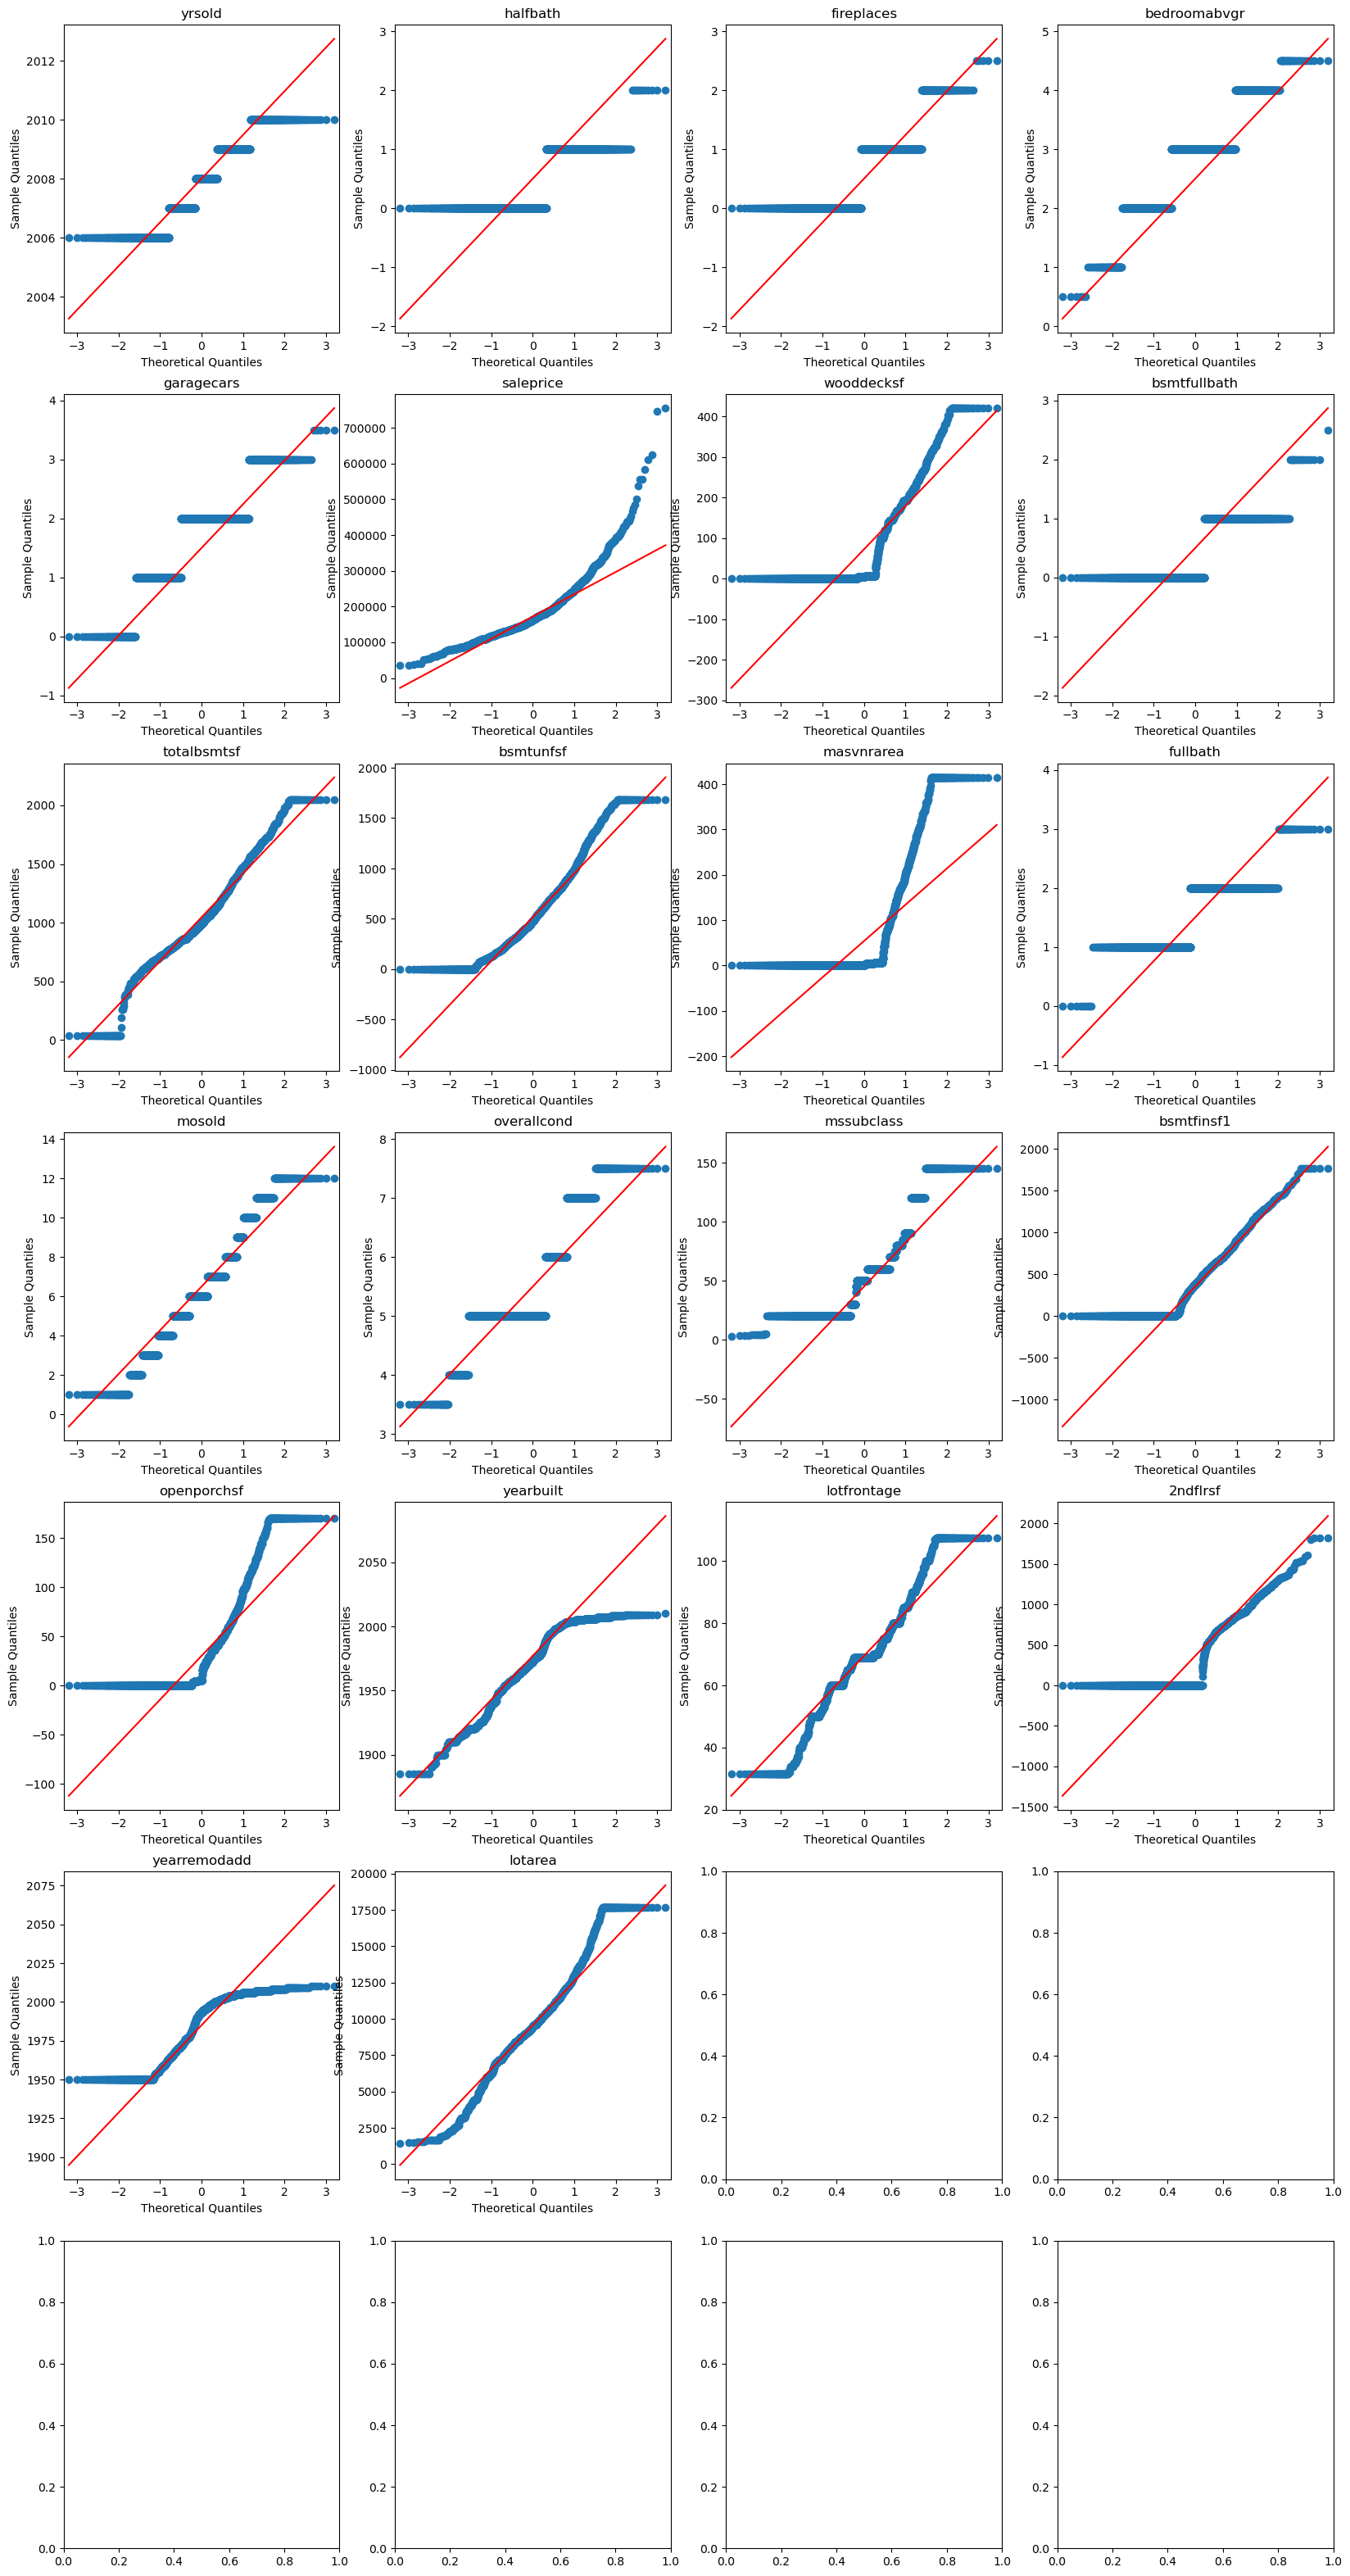

In [103]:
import statsmodels.api as sm
ncols = 4
nrows=7
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 40))
i=0
j=0
for col in num_cols:
    sm.qqplot(train_df[col],fit = False, line='q', ax = axes[i, j])
    axes[i, j].set_title(col)
    if(j<ncols-1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

checking for each feature if it follow normal distribution or not using Shapiro wilk test

In [104]:
from scipy.stats import shapiro 

alpha=0.05
fit_std_scale=[]
fit_min_max_scale=[]

for i in num_cols:
    w,p=shapiro(train_df[i])
    print(i,w,p)
    if p > alpha:
       fit_std_scale.append(i)
    else:
        fit_min_max_scale.append(i)

yrsold 0.8968685269355774 3.808782252596498e-30
halfbath 0.6375049948692322 0.0
fireplaces 0.7542260885238647 5.1834030195374983e-42
bedroomabvgr 0.8520214557647705 7.884645577296023e-35
garagecars 0.8336703181266785 2.014001935816895e-36
saleprice 0.8696949481964111 3.8664176516254365e-33
wooddecksf 0.7253619432449341 1.1210387714598537e-43
bsmtfullbath 0.6579182147979736 0.0
totalbsmtsf 0.9756856560707092 5.99997694011715e-15
bsmtunfsf 0.9319015145301819 3.362134299256169e-25
masvnrarea 0.6386470794677734 0.0
fullbath 0.7185800671577454 4.764414778704378e-44
mosold 0.9688436985015869 3.739136948403463e-17
overallcond 0.8190979957580566 1.370447589438119e-37
mssubclass 0.8386193513870239 5.237942990698648e-36
bsmtfinsf1 0.8851626515388489 1.6717811303227874e-31
openporchsf 0.7636666893959045 1.9681236931442056e-41
yearbuilt 0.9263235330581665 4.2119135703984343e-26
lotfrontage 0.9664708375930786 7.72704978952123e-18
2ndflrsf 0.7668527364730835 3.118169342815583e-41
yearremodadd 0.8635

In [105]:
print("follow normal distribution",fit_std_scale)
print("Not follow normal distribution",fit_min_max_scale)

follow normal distribution []
Not follow normal distribution ['yrsold', 'halfbath', 'fireplaces', 'bedroomabvgr', 'garagecars', 'saleprice', 'wooddecksf', 'bsmtfullbath', 'totalbsmtsf', 'bsmtunfsf', 'masvnrarea', 'fullbath', 'mosold', 'overallcond', 'mssubclass', 'bsmtfinsf1', 'openporchsf', 'yearbuilt', 'lotfrontage', '2ndflrsf', 'yearremodadd', 'lotarea']


In [106]:
fit_min_max_scale_without_target=list(set(fit_min_max_scale)-set(['saleprice']))

MIN/MAX Scaling & standardizing Numerical Features based on it's distribution

MIN/MAX scaling

In [107]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
min_max_scaler_model=minmax_scaler.fit(train_df[fit_min_max_scale_without_target])
min_max_scaled_train_data=pd.DataFrame( min_max_scaler_model.transform(train_df[fit_min_max_scale_without_target]), columns=fit_min_max_scale_without_target)

min_max_scaled_test_data=pd.DataFrame( min_max_scaler_model.transform(test_df[fit_min_max_scale_without_target]), columns=fit_min_max_scale_without_target)

split categorical features into ordinal or nominal

In [108]:
obj_cols

['garagetype',
 'exterior2nd',
 'kitchenqual',
 'bsmtfintype1',
 'housestyle',
 'fireplacequ',
 'lotshape',
 'mszoning',
 'bsmtexposure',
 'bsmtqual',
 'garagefinish',
 'foundation',
 'roofstyle',
 'heatingqc',
 'neighborhood',
 'exterior1st',
 'lotconfig',
 'exterqual']

In [109]:
ordinal_cols=['bsmtexposure','bsmtqual', 'fireplacequ','mszoning','exterqual','heatingqc','bsmtfintype1','garagefinish','lotshape','kitchenqual']
nominal_cols=['foundation','roofstyle', 'housestyle','exterior2nd','lotconfig','exterior1st','neighborhood','garagetype']

LabelEncoding 

In [110]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
label_encoded_data=pd.DataFrame()
label_encoded_test_data=pd.DataFrame()

for i in ordinal_cols:
   label_model=label.fit(train_df[i])
   label_encoded_data[i]=label_model.transform(train_df[i])
   
   label_encoded_test_data[i]=label_model.transform(test_df[i])

OnehotEncoding for train data

In [111]:
from sklearn.preprocessing import OneHotEncoder

onehot=OneHotEncoder(sparse=False)
onehot_model=onehot.fit(train_df[nominal_cols])
onehot_encoded_data=onehot_model.transform(train_df[nominal_cols])

a=onehot_model.categories_
col_names=[]
for list_ in a:
    for element in list_:
        col_names.append(element)

onehot_df=pd.DataFrame(onehot_encoded_data,columns=col_names)

OnehotEncoding for test data

In [112]:
onehot_encoded_test_data=onehot_model.transform(test_df[nominal_cols])

a=onehot_model.categories_
col_names=[]
for list_ in a:
    for element in list_:
        col_names.append(element)

onehot_test_df=pd.DataFrame(onehot_encoded_test_data,columns=col_names)

merge categorical columns

In [113]:
categorical_train_df=label_encoded_data.merge(onehot_df, right_index=True, left_index=True)
categorical_test_df=label_encoded_test_data.merge(onehot_test_df, right_index=True, left_index=True)

Merge numerical_dataframe and categorical_dataframe

In [114]:
final_train_data=categorical_train_df.merge(min_max_scaled_train_data, right_index=True, left_index=True, how='inner')
final_test_data=categorical_test_df.merge(min_max_scaled_test_data, right_index=True, left_index=True, how='inner')

split train data into x,y

In [115]:
x=final_train_data
y=train_df['saleprice']

In [116]:
x.columns = x.columns.astype(str) 

check Multicollinearity and drop feature has high Multicollinearity with other features

VIP (variance inflation factor)

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cleaned_df_from_muti=x.copy()
sz=len(x.columns)
cnt=0  # number_of_dropped_features


for i in range(sz):                       # calculate vif sequentially because may be VIF of feature change after drop another feature
    cnt=x.shape[1]-cleaned_df_from_muti.shape[1]                    
    idx=i-cnt # index of fited column
    vif=variance_inflation_factor(cleaned_df_from_muti.values,idx)
    if vif >= 10:
        temp=[cleaned_df_from_muti.columns[idx]]
        cleaned_df_from_muti.drop(columns=temp,inplace=True)
        final_test_data.drop(columns=temp,inplace=True)
        #cnt+=1                           Don't count because may be there is duplicate in column_names


In [118]:
cleaned_df_from_muti.shape # X_train data cleaned from multicollinearity

(1452, 89)

In [119]:
# drop index from y & cleaned_df_from_muti bec don't have the same index
y=y.reset_index(drop=True)
cleaned_df_from_muti=cleaned_df_from_muti.reset_index(drop=True)

measure the significance level of each feature and perform subset selection using the backward-stepwise method

In [120]:
from statsmodels.api import OLS
OLS(y,cleaned_df_from_muti).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.957     
Dependent Variable:     saleprice        AIC:                         35046.6514
Date:                   2024-10-04 11:28 BIC:                         35516.6335
No. Observations:       1452             Log-Likelihood:              -17434.   
Df Model:               89               F-statistic:                 363.4     
Df Residuals:           1363             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.960            Scale:                       1.6759e+09
---------------------------------------------------------------------------------
                 Coef.      Std.Err.      t     P>|t|      [0.025        0.975]  
---------------------------------------------------------------------------------
bsmtexposure   -3340.1380   1196.3313  -2.7920  0.0053    -5686.9882    -993.2878
bsmtqual       -5481.8563   1861.0783  -2.9455  0.0033    -9132.7448   -1830.9678
fireplacequ     1070.9461   1453.6521   0.7367  0.4614    -1780.6919    3922.5840
mszoning       29537.5656   2268.0354  13.0234  0.0000    25088.3469   33986.7842
exterqual      -3434.6860   2471.3533  -1.3898  0.1648    -8282.7546    1413.3827
heatingqc        366.9543    810.3752   0.4528  0.6508    -1222.7635    1956.6721
bsmtfintype1    5407.3797    799.4791   6.7636  0.0000     3839.0369    6975.7226
garagefinish     438.5980   1935.7133   0.2266  0.8208    -3358.7023    4235.8982
lotshape         915.9331    900.6115   1.0170  0.3093     -850.8020    2682.6682
kitchenqual    -3414.5345   1862.5976  -1.8332  0.0670    -7068.4033     239.3343
PConc          19600.6659   3648.4432   5.3723  0.0000    12443.4930   26757.8389
Slab             823.4169   9189.2183   0.0896  0.9286   -17203.1276   18849.9613
Stone          32634.4969  17444.1102   1.8708  0.0616    -1585.7184   66854.7121
Wood           15569.4629  24670.6662   0.6311  0.5281   -32827.1306   63966.0564
Gambrel        13267.0060  13207.9913   1.0045  0.3153   -12643.1896   39177.2016
Hip            12113.7076   3087.1589   3.9239  0.0001     6057.6094   18169.8057
Mansard        15622.3568  17047.5833   0.9164  0.3596   -17819.9894   49064.7030
Shed           14318.5038  30170.3712   0.4746  0.6352   -44866.8940   73503.9015
1.5Unf         -3054.7197  11703.1882  -0.2610  0.7941   -26012.9340   19903.4947
1Story         -2930.2402   4302.5868  -0.6810  0.4960   -11370.6505    5510.1702
2.5Fin         68896.2523  15678.3864   4.3943  0.0000    38139.8680   99652.6366
2.5Unf         33056.4430  13364.8635   2.4734  0.0135     6838.5104   59274.3756
2Story         18012.8087   4620.0296   3.8989  0.0001     8949.6690   27075.9483
SFoyer         -8018.1925   8686.7661  -0.9230  0.3562   -25059.0735    9022.6886
SLvl            3812.1187   7029.7675   0.5423  0.5877    -9978.2183   17602.4558
AsphShn        -5407.9134  31524.8031  -0.1715  0.8638   -67250.3083   56434.4814
Brk Cmn        -8183.2003  28740.3945  -0.2847  0.7759   -64563.4043   48197.0036
BrkFace       -14135.8846  12813.7056  -1.1032  0.2701   -39272.6075   11000.8383
ImStucc        33467.7120  14750.6429   2.2689  0.0234     4531.2875   62404.1365
Other         -18319.8560  42248.8269  -0.4336  0.6646  -101199.6325   64559.9204
Plywood          194.3076   6780.8329   0.0287  0.9771   -13107.6929   13496.3081
Stone         -14595.5162  23667.7338  -0.6167  0.5375   -61024.6513   31833.6188
Stucco        -14823.6938  14290.2370  -1.0373  0.2998   -42856.9372   13209.5495
Wd Sdng         -401.4586   7990.9992  -0.0502  0.9599   -16077.4494   15274.5323
Wd Shng       -18904.7823   9322.1421  -2.0279  0.0428   -37192.0843    -617.4804
CulDSac        16560.7993   5266.0679   3.1448  0.0017     6230.3224   26891.2762
FR2           -16240.3699   6807.2011  -2.3858  0

In [121]:
insignificant_features_list=[]
significant_df=cleaned_df_from_muti
LR_results=OLS(y,significant_df).fit().summary2().tables[1].reset_index().rename(columns={'index':'feature_name'})

while LR_results['P>|t|'].max() > 0.05:
    insignificant_feature=LR_results['feature_name'][ LR_results['P>|t|'] == LR_results['P>|t|'].max() ]
    insignificant_features_list.append(insignificant_feature)
    significant_df.drop(insignificant_feature,axis=1,inplace=True)
    final_test_data.drop(insignificant_feature,axis=1,inplace=True) # drop the same column from test data
    LR_results=OLS(y,significant_df).fit().summary2().tables[1].reset_index().rename(columns={'index':'feature_name'})


In [122]:
len(insignificant_features_list)

42

In [123]:
LRresult = OLS(y,significant_df).fit().summary().tables[0]
LRresult

Dep. Variable:,saleprice,R-squared (uncentered):,0.957
Model:,OLS,Adj. R-squared (uncentered):,0.956
Method:,Least Squares,F-statistic:,787.0
Date:,"Fri, 04 Oct 2024",Prob (F-statistic):,0.00
Time:,11:28:17,Log-Likelihood:,-17478.
No. Observations:,1452,AIC:,3.504e+04
Df Residuals:,1412,BIC:,3.525e+04
Df Model:,40,,
Covariance Type:,nonrobust,,


In [124]:
significant_df.shape

(1452, 40)

In [125]:
x=significant_df

In [126]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x,y)

LinearRegression()

Rearrange the columns of a final_test_data based on the column order of X_df

In [127]:
final_test_data = final_test_data.reindex(columns=x.columns)

In [130]:
y_pred=LR.predict(final_test_data)

In [131]:
y_pred

array([117674.90570411, 171947.33679163, 202633.00334522, ...,
       178278.59487772, 146555.00027455, 221473.6494431 ])

In [132]:
submissions['saleprice']=y_pred

In [133]:
submissions.to_csv('submission.csv',index=False)

save model as pickel file

In [134]:
import pickle
with open('Home price.sav','wb') as file:
  pickle.dump(LR,file)